[colab link](https://colab.research.google.com/drive/1DlTaizTwVJFEN1z4ETGXv78Erxj5xgyv?usp=sharing)

#Question 1 Covid 19 current wave in the United Kingdom

* Visualize wave spreading compared to first/second wave
* Compare effects of current wave compared to second wave on 3 systems:
    - Traffic
    - Mental health
    - Economy

In [ ]:
import json
import os

!mkdir /root/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle/’: File exists


In [ ]:
!pip install kaggle 


# creating kaggle.json file with the personal API-Key details 
# You can also put this file on your Google Drive
with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json

## Data Sources:
The goverment in the United Kingdom established a great [website](https://coronavirus.data.gov.uk/details/download) that offers data and information about covid in their country. Not all of the data had a permalink- so for reproducability I uploaded the files to a kaggle open dataset. I relied on the following resorces:
-  [health care](https://www.ons.gov.uk/peoplepopulationandcommunity/healthandsocialcare/healthandwellbeing/datasets/coronavirusandthesocialimpactsongreatbritaindata)
-  [Death cases](https://api.coronavirus.data.gov.uk/v2/data?areaType=overview&metric=hospitalCases&metric=newDeaths28DaysByDeathDate&format=csv&release=2022-01-22)
-  [Traffic](https://www.ons.gov.uk/economy/economicoutputandproductivity/output/datasets/trafficcameraactivity)
-  [Second Wave](https://www.ons.gov.uk/peoplepopulationandcommunity/healthandsocialcare/conditionsanddiseases/articles/coronaviruscovid19infectionsurveytechnicalarticle/wavesandlagsofcovid19inenglandjune2021#:~:text=The%20second%20wave%20of%20COVID,at%20the%20end%20of%20April)
-  [Self reported economy measures](https://www.ons.gov.uk/economy/economicoutputandproductivity/output/datasets/businessinsightsandimpactontheukeconomy)



In [ ]:
!mkdir ./datasets
!mkdir ./datasets/uk

!kaggle datasets download -d amirbialer/covid-uk-2022 -p ./datasets/uk
!unzip ./datasets/uk/*.zip  -d ./datasets/uk/

mkdir: cannot create directory ‘./datasets’: File exists
mkdir: cannot create directory ‘./datasets/uk’: File exists
  0% 0.00/4.03M [00:00<?, ?B/s]
100% 4.03M/4.03M [00:00<00:00, 66.0MB/s]
Archive:  ./datasets/uk/covid-uk-2022.zip
  inflating: ./datasets/uk/NUTS_Level_1_(January_2018)_Boundaries.geojson  
replace ./datasets/uk/UK_Flag.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
  inflating: ./datasets/uk/uk_county.json  


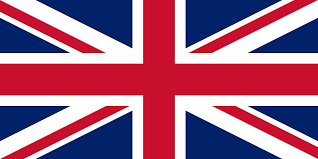

In [ ]:
from IPython.display import Image
Image('/content/datasets/uk/UK_Flag.png', width=700)

## Comparison of current wave spreading and 2nd

In [ ]:
!pip install turicreate


In [ ]:
import turicreate as tc
import pandas as pd

In [ ]:
!pip install plotly --upgrade
%matplotlib inline
import plotly as py
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

!pip install plotly --upgrade


%matplotlib inline

In [ ]:
import plotly as py
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
over=tc.SFrame.read_csv("/content/datasets/uk/overview_2022-01-22.csv")
over

Finished parsing file /content/datasets/uk/overview_2022-01-22.csv

Parsing completed. Parsed 100 lines in 0.043182 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,str,str,int,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Read 690 lines. Lines per second: 44524.7

Finished parsing file /content/datasets/uk/overview_2022-01-22.csv

Parsing completed. Parsed 690 lines in 0.015611 secs.

Columns:
	areaCode	str
	areaName	str
	areaType	str
	date	str
	hospitalCases	int
	newDeaths28DaysByDeathDate	int

Rows: 690

Data:
+-----------+----------------+----------+------------+---------------+----------------------------+
|  areaCode |    areaName    | areaType |    date    | hospitalCases | newDeaths28DaysByDeathDate |
+-----------+----------------+----------+------------+---------------+----------------------------+
| K02000001 | United Kingdom | overview | 2022-01-20 |     17976     |            147             |
| K02000001 | United Kingdom | overview | 2022-01-19 |     18517     |            208             |
| K02000001 | United Kingdom | overview | 2022-01-18 |     19014     |            208             |
| K02000001 | United Kingdom | overview | 2022-01-17 |     19498     |            254             |
| K02000001 | United Kingdom | overview | 2022-01-16 |     19271     |            252             |
| K02000001 | United Kingdom | overview | 2022-01-15 |     19152     |            262             |
| K02000001 | United Kingdom | overview | 2022-01-14 |     19404     |            240             |
| K02000001 | United Kingdom | overview | 2022-01-13 |     19628     |            260             |
| K02000001 | United Kingdom | overview | 2022-01-12 |     19802     |            240             |
| K02000001 | United Kingdom | overview | 2022-01-11 |     19845     |            246             |
+-----------+----------------+----------+------------+---------------+----------------------------+
[690 rows x 6 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

In [ ]:
#turicreate has problems with temporal data
df=over.to_dataframe()
df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')
fig=px.line(df, x="date", y="hospitalCases")
fig.add_vrect(x0=pd.Timestamp(year=2020, month=4, day=1), x1=pd.Timestamp(year=2020, month=5, day=22), 
              annotation_text="first wave", annotation_position="top left",
              fillcolor="green", opacity=0.25, line_width=0)
fig.add_vrect(x0=pd.Timestamp(year=2020, month=10, day=1), x1=pd.Timestamp(year=2021, month=4, day=1), 
              annotation_text="second wave", annotation_position="top left",
              fillcolor="red", opacity=0.25, line_width=0)
fig.add_vline(pd.Timestamp(year=2021, month=10, day=1), line_dash="dash", line_color="orange" )#label="start of first wave"
fig.add_annotation(x=pd.Timestamp(year=2021, month=10, day=1), y=30000, text="start of current wave")
fig.update_layout(
    xaxis_title="Date",
    yaxis_title="Hospital Cases")


In [ ]:
#turicreate has problems with temporal data
df=over.to_dataframe()
df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')
fig=px.line(df, x="date", y="newDeaths28DaysByDeathDate")
fig.add_vrect(x0=pd.Timestamp(year=2020, month=4, day=1), x1=pd.Timestamp(year=2020, month=5, day=22), 
              annotation_text="first wave", annotation_position="top left",
              fillcolor="green", opacity=0.25, line_width=0)
fig.add_vrect(x0=pd.Timestamp(year=2020, month=10, day=1), x1=pd.Timestamp(year=2021, month=4, day=1), 
              annotation_text="second wave", annotation_position="top left",
              fillcolor="red", opacity=0.25, line_width=0)
fig.add_vline(pd.Timestamp(year=2021, month=10, day=1), line_dash="dash", line_color="orange" )#label="start of first wave"
fig.add_annotation(x=pd.Timestamp(year=2021, month=10, day=1), y=100, text="start of current wave")
fig.update_layout(
    xaxis_title="Date",
    yaxis_title="Death Cases")

## Discussion
### Current Wave- what number?
I couln't find a data resource that counts the Covid waves in the UK. Looking at the graphs we can maybe tell why- after the summar days of this year and the last- there were small peaks before a major one- are they an independent wave or a part of a wave package?

### Spread Comparison
Looking at the graphs- we see that both hospital cases and death cases were much more **severe last year**, after the second wave. This wave is building slowly since summar- and it will be interesting to follow it.

## If I had unlimited resources:
- smelly anecdote: I was inspired by this recent [story](https://twitter.com/kate_ptrv/status/1332398737604431874/photo/1) where bad reviews on scented candles serve as proxy to detect covid spread in a country. Continuing this path of research would require actual number of positive covid cases and scented candles reviews from say a year before covid spread. I would start my analysis with basic correlation measure and continue with a regression model predicting actual number of positive cases.


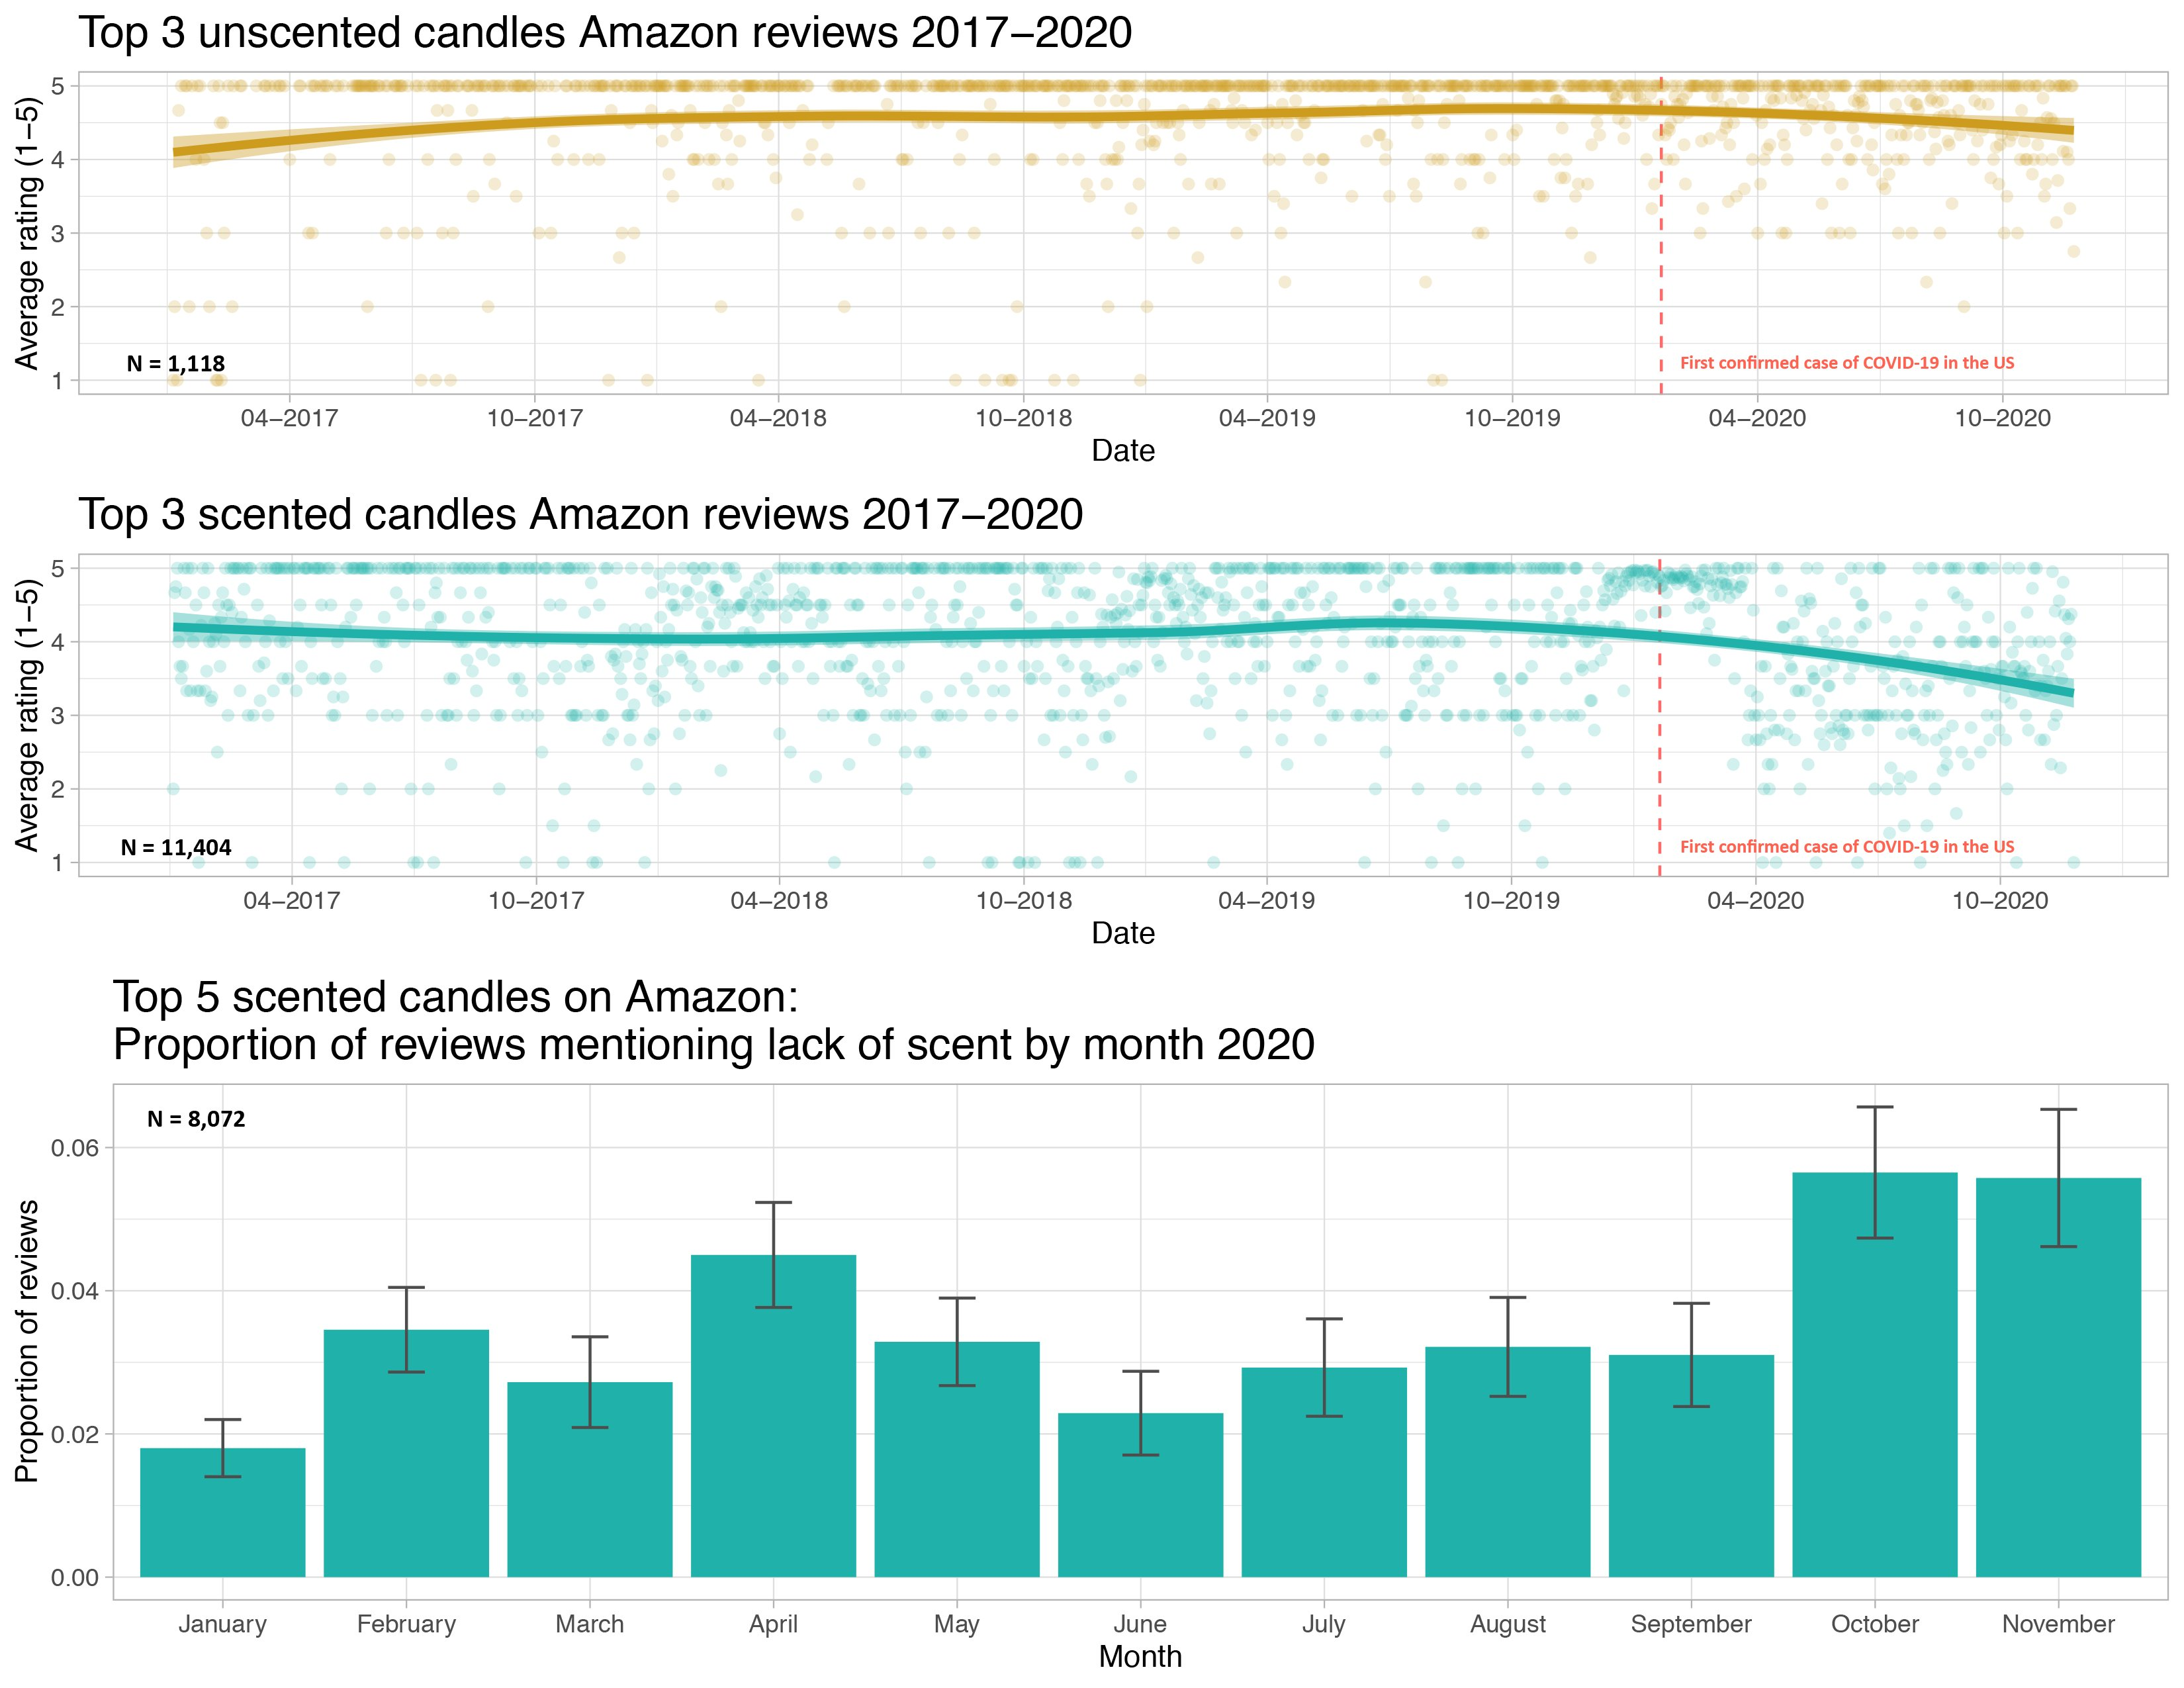

In [ ]:
from IPython.display import Image
Image('/content/datasets/uk/scented candles.jpg', width=1200)

## Mental health


### If I had unlimited resources
  - Public displayed emotions: social media serves a rich soil for emotion detection. I would start with a sentiment analysis and LIWC (psycholsist lexicon analysis) to detect emotions displayed in social media posts such as Facebook, Instagram, and Reddit. I would aggregate the emotions detected with each post and compare with interesting features such as nantional restrictions, location, education, relationship status, etc..
  - Mental health pills: it was shown in recent years that analysing the sewer can help accuratly detect the amount of all sorts of pills the population is consuming without the need for self declerations which is prone to be biased. I would analyse the report of anti-depressants pills and recreational drugs as a proxy for the mental health state of the population.
  - Official data from mental health offices: nothing to add, self explanatory.
  - I would analyze the sentiment and emotions in newspapers to understand the overall tone towards each wave. I wanted to implement this as my prototype but couldn't find free acess to old newspapers in the UK.
  - Self declared status of mental health: The goverment send surveys to the populations asking to self declare theit happiness, mental state and other sorts. While this method isn't necesserily the most accurate, it does describe at least partially what the average Joe is experiencing. Since I managed to find the answers to this survey, **this will be my prototype model**.



### Prototype

In [ ]:
xls = pd.ExcelFile('/content/datasets/uk/referencetables210122.xlsx')
ref=(pd.read_excel(xls, "Table 1b")).T 

In [ ]:
import re
import numpy as np
monnths_list=["January","February","March","April","May","June","July","August","September","October","November","December"]
month_name_dict={monnths_list[i]:i+1 for i in range(12)}
def parse_date(messy_date):
  """
  each date period is spanning about 10 days, I chose the start of this period as it's easiest to process and not that big of deal
  """
  try:
    messy_date=messy_date.replace("\n"," ")
    date_num=int(re.match("\d{1,2}",messy_date)[0])
    month=re.findall(r"(?:January|February|March|April|May|June|July|August|September|October|November|December)",messy_date)[0]
    year=2000+int(re.findall("'\d{2,2}",messy_date)[0][1:])
    return pd.Timestamp(year, month_name_dict[month],date_num)
  except:
    return np.nan

In [ ]:
ref["date"]=ref.iloc[:,2].apply(parse_date)
ref

0  ...       date
Table 1b: Trends in well-being and perceptions ...  Great Britain, March 2020 to January 2022  ...        NaT
Unnamed: 1                                                                                NaN  ... 2020-03-20
Unnamed: 2                                                                                NaN  ... 2020-03-27
Unnamed: 3                                                                                NaN  ... 2020-04-03
Unnamed: 4                                                                                NaN  ... 2020-04-09
...                                                                                       ...  ...        ...
Unnamed: 78                                                                               NaN  ... 2021-11-03
Unnamed: 79                                                                               NaN  ... 2021-11-18
Unnamed: 80                                                                               NaN  ... 2021-12-01
Unnamed: 81                                                                               NaN  ... 2021-12-15
Unnamed: 82                                                                               NaN  ... 2022-01-06

[83 rows x 48 columns]

In [ ]:
ref['date'] = pd.to_datetime(ref['date'])
ref.rename(columns={5:ref.iloc[0,5].replace(" [note 7]","")},inplace=True)
fig=px.line(ref, x="date", y="Life satisfaction")
fig.add_vrect(x0=pd.Timestamp(year=2020, month=4, day=1), x1=pd.Timestamp(year=2020, month=5, day=22), 
              annotation_text="first wave", annotation_position="top left",
              fillcolor="green", opacity=0.25, line_width=0)
fig.add_vrect(x0=pd.Timestamp(year=2020, month=10, day=1), x1=pd.Timestamp(year=2021, month=4, day=1), 
              annotation_text="second wave", annotation_position="top left",
              fillcolor="red", opacity=0.25, line_width=0)
fig.add_vline(pd.Timestamp(year=2021, month=10, day=1), line_dash="dash", line_color="orange" )#label="start of first wave"
fig.add_annotation(x=pd.Timestamp(year=2021, month=10, day=1), y=7, text="start of current wave")
fig.update_layout(
    xaxis_title="Date",
    yaxis_title="Life satisfaction (1-10 scale)")

In [ ]:
ref['date'] = pd.to_datetime(ref['date'])
ref.rename(columns={15:ref.iloc[0,15].replace(" [note 7]","")},inplace=True)

fig=px.line(ref, x="date", y="Percentage of adults that say their well-being is being affected by COVID-19")
fig.add_vrect(x0=pd.Timestamp(year=2020, month=4, day=1), x1=pd.Timestamp(year=2020, month=5, day=22), 
              annotation_text="first wave", annotation_position="top left",
              fillcolor="green", opacity=0.25, line_width=0)
fig.add_vrect(x0=pd.Timestamp(year=2020, month=10, day=1), x1=pd.Timestamp(year=2021, month=4, day=1), 
              annotation_text="second wave", annotation_position="top left",
              fillcolor="red", opacity=0.25, line_width=0)
fig.add_vline(pd.Timestamp(year=2021, month=10, day=1), line_dash="dash", line_color="orange" )#label="start of first wave"
fig.add_annotation(x=pd.Timestamp(year=2021, month=10, day=1), y=40, text="start of current wave")
fig.update_layout(
    xaxis_title="Date",
    yaxis_title="Percentage", title="Percentage of adults that say their well-being is being affected by COVID-19")

In [ ]:
ref['date'] = pd.to_datetime(ref['date'])
ref.rename(columns={16:ref.iloc[0,16].replace(" [note 7]","")},inplace=True)
fig=px.line(ref, x="date", y="Percentage of adults reporting they feel lonely often, always or some of the time")
fig.add_vrect(x0=pd.Timestamp(year=2020, month=4, day=1), x1=pd.Timestamp(year=2020, month=5, day=22), 
              annotation_text="first wave", annotation_position="top left",
              fillcolor="green", opacity=0.25, line_width=0)
fig.add_vrect(x0=pd.Timestamp(year=2020, month=10, day=1), x1=pd.Timestamp(year=2021, month=4, day=1), 
              annotation_text="second wave", annotation_position="top left",
              fillcolor="red", opacity=0.25, line_width=0)
fig.add_vline(pd.Timestamp(year=2021, month=10, day=1), line_dash="dash", line_color="orange" )#label="start of first wave"
fig.add_annotation(x=pd.Timestamp(year=2021, month=10, day=1), y=25, text="start of current wave")
fig.update_layout(
    xaxis_title="Date",
    yaxis_title="Percentage", title="Percentage of adults reporting they feel lonely often, always or some of the time")

### Discussion
Overall it looks like the second wave was the most harmful in mental health perspective with the least average life satisfaction, and most percentage of people being effected by it, and feeling lonesome.

## Traffic

### If I had unlimited resources
Traffic can be analysed in different granularity levels, and with different spatial-temporal aspects:
  - Statistical aspects- It would be really intersting to get measures like the amount of traffic jams, average number of people in a car, public transportation use, and other statistics that quantify the use of traffic.
  - Temporal aspects- such as daily and weekly seasonal counts of traffic jams and overall cars on the road can be analysed. 
  - Spatial aspcets like where are the cars located.
If I had unlimited data I would analyse traffic camaras to see whether people are visiting nature more, staying at home, and visiting family (this would require additional information of course- where is home (based on social media) where is nature? (based on goverment resources))
  - I do have agrregated data of traffic cameras in the past year. Some of the data is missing, and I will need extra resources to map the data into human level understanding **this will be my prototype model**.
  <br>
  <br>
  Moreover I would have liked to use all of the data for a regression model that predicts, say traffic jams in a given place and time.



### Prototype

In [ ]:
import pandas as pd


In [ ]:
trafic_xls = pd.ExcelFile('/content/datasets/uk/trafficcameraactivitydataset200122.xlsx')
tr=(pd.read_excel(trafic_xls, "Non seasonally adjusted"))
tr["date"]=pd.to_datetime(tr.iloc[:,0],format = '%Y-%m-%d',errors="ignore")
tr

Unnamed: 0  ...                 date
0                         ...                     
1                    NaN  ...                  NaN
2                    NaN  ...                  NaN
3                    NaN  ...                  NaN
4    2020-03-01 00:00:00  ...  2020-03-01 00:00:00
..                   ...  ...                  ...
686  2022-01-12 00:00:00  ...  2022-01-12 00:00:00
687  2022-01-13 00:00:00  ...  2022-01-13 00:00:00
688  2022-01-14 00:00:00  ...  2022-01-14 00:00:00
689  2022-01-15 00:00:00  ...  2022-01-15 00:00:00
690  2022-01-16 00:00:00  ...  2022-01-16 00:00:00

[691 rows x 38 columns]

In [ ]:
cars=tr[["date",'London','North East','Northern Ireland','Southend','Greater Manchester','Reading']]
cars=cars.iloc[4:]
num_cols=cars.columns[1:]
cars[num_cols]=cars[num_cols].apply(pd.to_numeric, errors="coerce")
cars

date    London  ...  Greater Manchester  Reading
4    2020-03-01 00:00:00       NaN  ...                 NaN      NaN
5    2020-03-02 00:00:00       NaN  ...                 NaN      NaN
6    2020-03-03 00:00:00       NaN  ...                 NaN      NaN
7    2020-03-04 00:00:00       NaN  ...                 NaN      NaN
8    2020-03-05 00:00:00       NaN  ...                 NaN      NaN
..                   ...       ...  ...                 ...      ...
686  2022-01-12 00:00:00  245299.0  ...              9303.0      NaN
687  2022-01-13 00:00:00  248963.0  ...              9832.0      NaN
688  2022-01-14 00:00:00  272365.0  ...             10539.0      NaN
689  2022-01-15 00:00:00  285291.0  ...             10207.0      NaN
690  2022-01-16 00:00:00  281315.0  ...              8573.0      NaN

[687 rows x 7 columns]

In [ ]:
cars["year"]=[c.year for c in cars["date"]]
cars["month"]=[c.month for c in cars["date"]]



London                6809284.0
North East            1357558.0
Northern Ireland        55644.0
Southend               107631.0
Greater Manchester     246262.0
Reading                 81025.0
year                    62620.0
month                     372.0
dtype: float64

In [ ]:
second_wave=(cars.loc[np.logical_and(cars["year"]==2020 ,cars["month"]==12)]).sum()
second_wave=second_wave.drop(["month","year"])
second_wave

London                6809284.0
North East            1357558.0
Northern Ireland        55644.0
Southend               107631.0
Greater Manchester     246262.0
Reading                 81025.0
dtype: float64

In [ ]:
!pip install geopandas
!pip install descartes
!pip install geopy
!pip install folium
!pip install geojson

In [ ]:
import folium,geojson

In [ ]:
import json
geojson_path="/content/datasets/uk/NUTS_Level_1_(January_2018)_Boundaries.geojson"
with open(geojson_path) as geojson_file:
    geo_file = json.load(geojson_file)

In [ ]:
locations=[a["properties"]["nuts118nm"] for a in geo_file["features"]]
locations

In [ ]:
def prepare_wave_data(wave):
  row_table=pd.DataFrame(wave)
  row_table.columns=["cars"]
  row_table["location"]=wave.index
  row_table=row_table.append({"cars":wave["Reading"]+wave["Southend"], "location":"South East (England)"}, ignore_index=True)
  row_table["location"]=row_table["location"].replace({"North East":'North East (England)',"Northern Ireland":'Northern Ireland',"Greater Manchester":'North West (England)'})
  row_table=row_table.loc[row_table["location"].isin(locations)]
  return row_table

In [ ]:
from branca.utilities import split_six
def create_choropleth_map(wave):
  row_table=prepare_wave_data(wave)
  state_geo = 'http://geoportal1-ons.opendata.arcgis.com/datasets/01fd6b2d7600446d8af768005992f76a_4.geojson'

  m = folium.Map(location=[55, 4], zoom_start=5)
  m.choropleth(
      geo_data=geo_file,
      geo_str='choropleth',
      data=row_table,
      columns=['location', 'cars'],
      key_on='feature.properties.nuts118nm',
      fill_color='YlGnBu',
      fill_opacity=0.2, 
      line_opacity=0.8,
      smooth_factor=0,
      legend_name='Number of cars'
  )
  return m

In [ ]:
create_choropleth_map(second_wave)

/usr/local/lib/python3.7/dist-packages/folium/folium.py:426: FutureWarning:

The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.



In [ ]:
current_wave=(cars.loc[np.logical_and(cars["year"]==2021 ,cars["month"]==12)]).sum()
current_wave=current_wave.drop(["month","year"])
create_choropleth_map(current_wave)

/usr/local/lib/python3.7/dist-packages/folium/folium.py:426: FutureWarning:

The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.



### Discussion
I admit it not easy to detect patterns in this visualization:
  - Partial matching- I have found data that apperantly matches only part of the United Kingdom, and not all of it.
  - The differences are too subtle to be able to remember the first map, and see in the second map.
  - Given more time I would have tweeked the settings to show the differences better, and display the figures next to each other.
  - **Simple solution** I will subtract the count from the second wave to the current wave and show a map of the difference in the amount of cars driving in this wave compared with the second wave.


In [ ]:
diff_wave=current_wave-second_wave
diff_wave

London                1410419.0
North East             -29980.0
Northern Ireland        18366.0
Southend               -90507.0
Greater Manchester      45911.0
Reading                -81025.0
dtype: float64

### Results

In [ ]:
create_choropleth_map(diff_wave)

/usr/local/lib/python3.7/dist-packages/folium/folium.py:426: FutureWarning:

The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.



### Finally
Some signal can be seen- the are more cars in London in the current wave, and less cars in the outer part of the UK compared to the second wave of last year.

## Economy

### If I had unlimited resources
"Economy is the physics of buisness" is a made up quote with some truth in it.
Many interesting analysis options are available- examining national statistics like average GDP, salary, unemployment rate, etc..
Personaly- I think most of us are aware of buisnesses that were hurt because of Covid spread: restaurants, gyms, tourism, etc.. It will be interesting to find out which buisness thrived and succeeded during the covid wave. More concretly do the buisnesses that thrived during the second wave still manage well?  or was it a temporary sucess? for that I will need buisness tax report (for income and outcome), and some metadata on the type of buisness so I could group them into catagories.
<br>
<br>
I managed to find a **self declerated questionare** reporting buisness status. I will analyse it and see what patterns I can find as my prototype.

### Prototype

In [ ]:
buis_xls = pd.ExcelFile('/content/datasets/uk/bicswave47final.xlsx')
waves=(pd.read_excel(buis_xls, "Dates"))
waves.columns=waves.iloc[3,:].values
waves=waves.iloc[4:]

In [ ]:
waves.iloc[:5]

Wave  ...                  Survey live period
4  Wave 47  ...  27 December 2021 to 9 January 2022
5  Wave 46  ...     13 December to 26 December 2021
6  Wave 45  ...     29 November to 12 December 2021
7  Wave 44  ...     15 November to 28 November 2021
8  Wave 43  ...      1 November to 14 November 2021

[5 rows x 3 columns]

In [ ]:
monnths_list=["January","February","March","April","May","June","July","August","September","October","November","December"]
month_name_dict={monnths_list[i]:i+1 for i in range(12)}
def parse_dates_waves(messy_date):
  """
  like before, return first date of period because they all range between 2-4 weeks
  """
  try:
    day=int(re.findall("\d{1,2}",messy_date)[0])
    month=re.findall(r"(?:January|February|March|April|May|June|July|August|September|October|November|December)",messy_date)[0]
    year=int(re.findall("\d{4,4}",messy_date)[0])
    return pd.Timestamp(year, month_name_dict[month],day)
  except:
    return np.nan


In [ ]:
waves["date"]=waves["Reference period"].apply(parse_dates_waves)
waves["date"]=pd.to_datetime(waves["date"])

In [ ]:
waves.iloc[:3]

Wave  ...       date
4  Wave 47  ... 2021-12-13
5  Wave 46  ... 2021-11-29
6  Wave 45  ... 2021-11-15

[3 rows x 4 columns]

In [ ]:
buis_xls.sheet_names[:3]

['Read me', 'Table of Contents', 'Notes (1)']

In [ ]:
cash=(pd.read_excel(buis_xls, "Cash Reserves TS (WTD)"))#cash reserves, existing hourly wages
question=cash.columns[0]
cash.columns=cash.iloc[4,:].values
cash=cash.iloc[5:]
cash

Dates     Wave  ... More than 6 months  Not sure
5     27 December 2021 to 9 January 2022  Wave 47  ...               0.257    0.131
6     27 December 2021 to 9 January 2022  Wave 47  ...                 [c]      [c]
7     27 December 2021 to 9 January 2022  Wave 47  ...               0.196    0.235
8     27 December 2021 to 9 January 2022  Wave 47  ...               0.327    0.206
9     27 December 2021 to 9 January 2022  Wave 47  ...                0.08    0.328
...                                  ...      ...  ...                 ...      ...
2142             15 June to 28 June 2020  Wave 07  ...               0.153    0.188
2143             15 June to 28 June 2020  Wave 07  ...               0.172    0.201
2144             15 June to 28 June 2020  Wave 07  ...               0.205     0.24
2145             15 June to 28 June 2020  Wave 07  ...               0.173    0.166
2146             15 June to 28 June 2020  Wave 07  ...               0.166    0.156

[2142 rows x 10 columns]

In [ ]:
cash_numeric_cols=["No cash reserves ",'Less than 1 month ','1 to 3 months ',
       '4 to 6 months', 'More than 6 months ', 'Not sure']
cash[cash_numeric_cols]=cash[cash_numeric_cols].apply(pd.to_numeric, errors="coerce")
cash=cash.dropna()
cash["date"]=pd.to_datetime(cash["Dates"].apply(parse_dates_waves),errors="coerce")
cash

Dates     Wave  ... Not sure       date
5     27 December 2021 to 9 January 2022  Wave 47  ...    0.131 2021-12-27
7     27 December 2021 to 9 January 2022  Wave 47  ...    0.235 2021-12-27
8     27 December 2021 to 9 January 2022  Wave 47  ...    0.206 2021-12-27
9     27 December 2021 to 9 January 2022  Wave 47  ...    0.328 2021-12-27
10    27 December 2021 to 9 January 2022  Wave 47  ...    0.220 2021-12-27
...                                  ...      ...  ...      ...        ...
2142             15 June to 28 June 2020  Wave 07  ...    0.188 2020-06-15
2143             15 June to 28 June 2020  Wave 07  ...    0.201 2020-06-15
2144             15 June to 28 June 2020  Wave 07  ...    0.240 2020-06-15
2145             15 June to 28 June 2020  Wave 07  ...    0.166 2020-06-15
2146             15 June to 28 June 2020  Wave 07  ...    0.156 2020-06-15

[1601 rows x 11 columns]

In [ ]:
all_buis=cash.loc[cash["Industry/Size Band"]=="All businesses"]
all_buis

Dates     Wave  ... Not sure       date
25    27 December 2021 to 9 January 2022  Wave 47  ...    0.186 2021-12-27
46    27 December 2021 to 9 January 2022  Wave 47  ...    0.180 2021-12-27
67    27 December 2021 to 9 January 2022  Wave 47  ...    0.252 2021-12-27
88       29 November to 12 December 2021  Wave 45  ...    0.206 2021-11-29
109      29 November to 12 December 2021  Wave 45  ...    0.206 2021-11-29
...                                  ...      ...  ...      ...        ...
2062             29 June to 12 July 2020  Wave 08  ...    0.173 2020-06-29
2083             29 June to 12 July 2020  Wave 08  ...    0.125 2020-06-29
2104             15 June to 28 June 2020  Wave 07  ...    0.157 2020-06-15
2125             15 June to 28 June 2020  Wave 07  ...    0.158 2020-06-15
2146             15 June to 28 June 2020  Wave 07  ...    0.156 2020-06-15

[102 rows x 11 columns]

In [ ]:
all_buis["Trading Status"].unique()

array(['Not permanently stopped trading', 'Currently trading',
       'Temporarily closed or paused trading'], dtype=object)

In [ ]:
trading=all_buis.loc[all_buis["Trading Status"]=='Currently trading']
t=trading[trading.columns[-7:]]
time_data=t.melt(id_vars="date", var_name="cash reserve")

In [ ]:
fig=px.line(time_data, x="date", y="value",color='cash reserve')
fig.add_vrect(x0=pd.Timestamp(year=2020, month=4, day=1), x1=pd.Timestamp(year=2020, month=5, day=22), 
              annotation_text="first wave", annotation_position="top left",
              fillcolor="green", opacity=0.25, line_width=0)
fig.add_vrect(x0=pd.Timestamp(year=2020, month=10, day=1), x1=pd.Timestamp(year=2021, month=4, day=1), 
              annotation_text="second wave", annotation_position="top left",
              fillcolor="red", opacity=0.25, line_width=0)
fig.add_vline(pd.Timestamp(year=2021, month=10, day=1), line_dash="dash", line_color="orange" )#label="start of first wave"
fig.add_annotation(x=pd.Timestamp(year=2021, month=10, day=1), y=0.3, text="start of current wave")
fig.update_layout(
    xaxis_title="Date",
    yaxis_title="Percentage", title=question)

### Discussion
- We can see a high risk in Uncertainty in the current wave that has never been seen before, including the second wave.
- We can see a decline a major decline in reserves that are more than 6 months.
<br> <br>
Overall, this graph shows the current wave is **the worst** in terms of cash reserves for the buisnesses that filled this review.

---------------------------------------
---------------------------------------
---------------------------------------

# Question 2- Meta Kaggle
notice the first two parts I solve accuratly without the need to speculate if I had unlimited resorces, only the later two subquestions need this speculation

In [1]:
import json
import os

!mkdir /root/.kaggle/

In [2]:
!pip install kaggle 

#Important Note: complete this with your own key - after running this for the first time remmember to **remove** your API_KEY

# creating kaggle.json file with the personal API-Key details 
# You can also put this file on your Google Drive
with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json

In [3]:
!mkdir ./datasets
!mkdir ./datasets/kaggle_meta

!kaggle datasets download -d kaggle/meta-kaggle -p ./datasets/kaggle_meta
!unzip ./datasets/kaggle_meta/*.zip  -d ./datasets/kaggle_meta/

100% 4.52G/4.52G [00:36<00:00, 109MB/s]
100% 4.52G/4.52G [00:36<00:00, 133MB/s]
Archive:  ./datasets/kaggle_meta/meta-kaggle.zip
  inflating: ./datasets/kaggle_meta/CompetitionTags.csv  
  inflating: ./datasets/kaggle_meta/Competitions.csv  
  inflating: ./datasets/kaggle_meta/DatasetTags.csv  
  inflating: ./datasets/kaggle_meta/DatasetTaskSubmissions.csv  
  inflating: ./datasets/kaggle_meta/DatasetTasks.csv  
  inflating: ./datasets/kaggle_meta/DatasetVersions.csv  
  inflating: ./datasets/kaggle_meta/DatasetVotes.csv  
  inflating: ./datasets/kaggle_meta/Datasets.csv  
  inflating: ./datasets/kaggle_meta/Datasources.csv  
  inflating: ./datasets/kaggle_meta/EpisodeAgents.csv  
  inflating: ./datasets/kaggle_meta/Episodes.csv  
  inflating: ./datasets/kaggle_meta/ForumMessageVotes.csv  
  inflating: ./datasets/kaggle_meta/ForumMessages.csv  
  inflating: ./datasets/kaggle_meta/ForumTopics.csv  
  inflating: ./datasets/kaggle_meta/Forums.csv  
  inflating: ./datasets/kaggle_meta/Kern

In [7]:
!pip install turicreate
!pip install networkx --upgrade
!pip install python-igraph


     |████████████████████████████████| 92.0 MB 15 kB/s 
     |████████████████████████████████| 3.6 MB 31.5 MB/s 
     |████████████████████████████████| 86.4 MB 1.2 MB/s 
     |████████████████████████████████| 3.5 MB 53.7 MB/s 
     |████████████████████████████████| 322 kB 62.4 MB/s 
     |████████████████████████████████| 18.3 MB 57 kB/s 
     |████████████████████████████████| 50 kB 3.6 MB/s 
     |████████████████████████████████| 3.8 MB 38.0 MB/s 
     |████████████████████████████████| 449 kB 43.6 MB/s 
     |████████████████████████████████| 2.9 MB 29.7 MB/s 
     |████████████████████████████████| 20.1 MB 2.0 MB/s 
  Created wheel for prettytable: filename=prettytable-0.7.2-py3-none-any.whl size=13714 sha256=be8a460553706ad09924365c484a137be2d954010b9928ba6eec05ec4268ee4c
  Stored in directory: /root/.cache/pip/wheels/b2/7f/f6/f180315b584f00445045ff1699b550fa895d09471337ce21c6
  Created wheel for resampy: filename=resampy-0.2.1-py3-none-any.whl size=320859 sha256=e8df1650dcf

     |████████████████████████████████| 3.1 MB 5.5 MB/s 


In [9]:
import networkx as nx
import turicreate as tc 
import pandas as pd
import numpy as np

In [10]:
sf=tc.SFrame().read_csv("/content/datasets/kaggle_meta/TeamMemberships.csv")
sf

Finished parsing file /content/datasets/kaggle_meta/TeamMemberships.csv

Parsing completed. Parsed 100 lines in 1.92992 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,int,int,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Read 1243254 lines. Lines per second: 729932

Finished parsing file /content/datasets/kaggle_meta/TeamMemberships.csv

Parsing completed. Parsed 4980215 lines in 3.38343 secs.

Columns:
	Id	int
	TeamId	int
	UserId	int
	RequestDate	str

Rows: 4980215

Data:
+-------+--------+--------+-------------+
|   Id  | TeamId | UserId | RequestDate |
+-------+--------+--------+-------------+
| 16458 |  518   |  635   |             |
| 16464 |  526   |  839   |             |
| 16465 |  527   |  816   |             |
| 16466 |  528   |  778   |             |
| 16467 |  529   |  747   |             |
| 16468 |  531   |  842   |             |
| 16469 |  532   |  820   |             |
| 16470 |  532   |  879   |             |
| 16471 |  533   |  819   |             |
| 16472 |  533   |  821   |             |
+-------+--------+--------+-------------+
[4980215 rows x 4 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

In [ ]:
users=sf.groupby("UserId",{'user_in_teams':tc.aggregate.DISTINCT('TeamId')})
users.materialize()
users

Columns:
	UserId	int
	user_in_teams	list

Rows: 1794466

Data:
+---------+-------------------------------+
|  UserId |         user_in_teams         |
+---------+-------------------------------+
| 3324072 |           [3265124]           |
| 7372189 |       [6765377, 6761572]      |
| 4667467 |           [5058695]           |
| 1731765 |           [1670414]           |
| 9405685 |           [8005779]           |
|  368497 |            [190346]           |
| 2659655 |       [6389946, 6182616]      |
| 9160616 |           [7899043]           |
|  251434 | [1295899, 1717258, 4809249... |
| 6214445 |           [5875453]           |
+---------+-------------------------------+
[1794466 rows x 2 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

In [ ]:
#avoid user that are in a single user team as they don't contribute to the social netwrok:
social_users=users[users["user_in_teams"].apply(lambda x: len(x)>1)]
social_users.materialize()
social_users

Columns:
	UserId	int
	user_in_teams	list

Rows: 786032

Data:
+---------+-------------------------------+
|  UserId |         user_in_teams         |
+---------+-------------------------------+
| 7372189 |       [6765377, 6761572]      |
| 2659655 |       [6389946, 6182616]      |
|  251434 | [1295899, 1717258, 4809249... |
| 1663427 | [3056510, 2181140, 2958974... |
|  879592 | [810847, 2963376, 691744, ... |
| 2759692 | [3382911, 6878829, 2700841... |
| 7818101 |       [7130179, 7041928]      |
| 4179954 |       [4103927, 4103056]      |
| 2091951 | [5120063, 6243676, 2016256... |
| 7268118 | [7420728, 6795243, 6795460... |
+---------+-------------------------------+
[786032 rows x 2 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

In [ ]:
#handy little function:
import itertools
example_l=[1,2,3,4]
list(itertools.combinations(example_l,2))

[(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)]

In [ ]:
def Clique_Users(l):
  if len(l)==1:
    print("bug!")
  if len(l)==2:
    return [((l[0],l[1]))]
  #more than 2:
  return list(itertools.combinations(list(l),2))


In [ ]:
edges_messy_list=list(social_users["user_in_teams"].apply(Clique_Users))
edges_messy_list

[[array('d', [6765377.0, 6761572.0])],
 [array('d', [6389946.0, 6182616.0])],
 [array('d', [1295899.0, 1717258.0]),
  array('d', [1295899.0, 4809249.0]),
  array('d', [1295899.0, 4861133.0]),
  array('d', [1717258.0, 4809249.0]),
  array('d', [1717258.0, 4861133.0]),
  array('d', [4809249.0, 4861133.0])],
 [array('d', [3056510.0, 2181140.0]),
  array('d', [3056510.0, 2958974.0]),
  array('d', [3056510.0, 2955138.0]),
  array('d', [3056510.0, 4856542.0]),
  array('d', [2181140.0, 2958974.0]),
  array('d', [2181140.0, 2955138.0]),
  array('d', [2181140.0, 4856542.0]),
  array('d', [2958974.0, 2955138.0]),
  array('d', [2958974.0, 4856542.0]),
  array('d', [2955138.0, 4856542.0])],
 [array('d', [810847.0, 2963376.0]),
  array('d', [810847.0, 691744.0]),
  array('d', [810847.0, 2783431.0]),
  array('d', [810847.0, 2963371.0]),
  array('d', [2963376.0, 691744.0]),
  array('d', [2963376.0, 2783431.0]),
  array('d', [2963376.0, 2963371.0]),
  array('d', [691744.0, 2783431.0]),
  array('d', [6

In [ ]:
flat_edges_list = np.array([item for sublist in edges_messy_list for item in sublist]).astype(int)
flat_edges_list=flat_edges_list.tolist()
edges_frame=pd.DataFrame().from_records(flat_edges_list, columns=["src_field","dst_field"])

In [ ]:
edges_frame

src_field  dst_field
0           6765377    6761572
1           6389946    6182616
2           1295899    1717258
3           1295899    4809249
4           1295899    4861133
...             ...        ...
30378703    2101088    1642512
30378704    4848130    1642512
30378705    7052297    7096303
30378706    1034465    4724499
30378707    6837626    6001151

[30378708 rows x 2 columns]

In [ ]:
sg = tc.SGraph().add_edges(edges_frame, src_field ="src_field",dst_field="dst_field" )
sg.summary()

{'num_edges': 30378708, 'num_vertices': 3854428}

## Analyse central teams
there are many centrality measures. The easiest one to analyse with SGraphs is "pagerank"

In [ ]:
pr = tc.pagerank.create(sg)

Counting out degree

Done counting out degree

+-----------+-----------------------+

| Iteration | L1 change in pagerank |

+-----------+-----------------------+

| 1         | 2.19817e+06           |

| 2         | 1.18343e+06           |

| 3         | 551267                |

| 4         | 259766                |

| 5         | 116451                |

| 6         | 49609.2               |

| 7         | 20625.9               |

| 8         | 8688.79               |

| 9         | 3857.12               |

| 10        | 1859.61               |

| 11        | 981.434               |

| 12        | 560.122               |

| 13        | 339.774               |

| 14        | 215.489               |

| 15        | 141.04                |

| 16        | 94.4845               |

| 17        | 64.5                  |

| 18        | 44.7318               |

| 19        | 31.4546               |

| 20        | 22.3935               |

+-----------+-----------------------+

In [ ]:
pr['pagerank'].sort("pagerank",ascending=False)

Columns:
	__id	int
	pagerank	float
	delta	float

Rows: 3854428

Data:
+---------+--------------------+------------------------+
|   __id  |      pagerank      |         delta          |
+---------+--------------------+------------------------+
| 7245184 | 87.07534025383522  | 0.0017577961850321344  |
| 6986129 | 53.38052574939712  | 0.0002980823483653694  |
| 7244870 | 47.06755653633212  | 0.00042430778920277135 |
|  37865  | 35.278379525718954 | 0.0038506203270358696  |
| 7244456 | 33.02981618664952  | 0.0001611067211513273  |
|   9348  | 29.65611074296138  | 2.4785520000847328e-05 |
| 6967442 | 28.85430682462431  | 6.838099085371141e-05  |
| 5580501 | 28.52435991104787  |  0.003505082149157346  |
| 6907428 | 27.62673180597383  | 1.6201085109912583e-05 |
| 6715859 | 27.409612784389267 | 1.5600777373947494e-05 |
+---------+--------------------+------------------------+
[3854428 rows x 3 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

### What are the most central teams?

In [ ]:
top10=pr['pagerank'].sort("pagerank",ascending=False)[:10]
top10

Columns:
	__id	int
	pagerank	float
	delta	float

Rows: 10

Data:
+---------+--------------------+------------------------+
|   __id  |      pagerank      |         delta          |
+---------+--------------------+------------------------+
| 7245184 | 87.07534025383522  | 0.0017577961850321344  |
| 6986129 | 53.38052574939712  | 0.0002980823483653694  |
| 7244870 | 47.06755653633212  | 0.00042430778920277135 |
|  37865  | 35.278379525718954 | 0.0038506203270358696  |
| 7244456 | 33.02981618664952  | 0.0001611067211513273  |
|   9348  | 29.65611074296138  | 2.4785520000847328e-05 |
| 6967442 | 28.85430682462431  | 6.838099085371141e-05  |
| 5580501 | 28.52435991104787  |  0.003505082149157346  |
| 6907428 | 27.62673180597383  | 1.6201085109912583e-05 |
| 6715859 | 27.409612784389267 | 1.5600777373947494e-05 |
+---------+--------------------+------------------------+
[10 rows x 3 columns]

In [ ]:
small_sf=sf[sf["TeamId"].is_in(top10["__id"])]
small_sf.materialize()
small_sf

Columns:
	Id	int
	TeamId	int
	UserId	int
	RequestDate	str

Rows: 10

Data:
+---------+---------+---------+-------------+
|    Id   |  TeamId |  UserId | RequestDate |
+---------+---------+---------+-------------+
|  24274  |   9348  |   993   |  11/18/2011 |
|  55881  |  37865  |   3258  |  03/26/2013 |
| 5733048 | 5580501 |  622729 |  09/27/2020 |
| 6916151 | 6715859 | 7092593 |  04/30/2021 |
| 7457926 | 7244870 | 5030586 |  08/10/2021 |
| 7458242 | 7245184 | 5030586 |  08/10/2021 |
| 7114971 | 6907428 | 1202826 |  06/03/2021 |
| 7457512 | 7244456 | 5030586 |  08/10/2021 |
| 7176335 | 6967442 |  929585 |  06/16/2021 |
| 7195388 | 6986129 |  929585 |  06/20/2021 |
+---------+---------+---------+-------------+
[10 rows x 4 columns]

In [ ]:
small_sf["UserId"].unique()

dtype: int
Rows: 7
[5030586, 929585, 993, 622729, 1202826, 7092593, 3258]

In [ ]:
a=sf[sf["UserId"]==993]
a.materialize()
a

Columns:
	Id	int
	TeamId	int
	UserId	int
	RequestDate	str

Rows: 482

Data:
+-------+--------+--------+-------------+
|   Id  | TeamId | UserId | RequestDate |
+-------+--------+--------+-------------+
| 18124 |  3474  |  993   |             |
| 17255 |  1490  |  993   |             |
| 20493 |  5833  |  993   |  08/11/2011 |
| 20853 |  6156  |  993   |  09/06/2011 |
| 22245 |  7467  |  993   |  10/07/2011 |
| 20886 |  6187  |  993   |  09/08/2011 |
| 22063 |  7263  |  993   |  10/02/2011 |
| 21536 |  6815  |  993   |  09/19/2011 |
| 24922 |  9949  |  993   |  11/28/2011 |
| 23044 |  8218  |  993   |  10/30/2011 |
+-------+--------+--------+-------------+
[482 rows x 4 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

### Discussion
the top 10 most central teams, only belong to 7 users. <br>
Naively we would expect the central teams to be large- but if the centrality algorithm takes into account the teams size- it actually makes sense that the most central teams are single users. As we can see- user 993, belongs to 482 teams, so his/her solo team would be pretty central.

### Visualization
drawing the 50 most central teams

In [ ]:
top50=pr['pagerank'].sort("pagerank",ascending=False)[:50]
nodes=top50["__id"]

In [ ]:
subg=sg.get_neighborhood(nodes,full_subgraph =True, radius=0)
subg

SGraph({'num_edges': 21, 'num_vertices': 50})
Vertex Fields:['__id']
Edge Fields:['__src_id', '__dst_id']

In [ ]:
def sgraph2nxgraph(sgraph, is_directed=True, add_vertices_attributes=True, add_edges_attributes=True):
    if is_directed:
        nx_g = nx.DiGraph()
    else:
        nx_g = nx.Graph()
    if add_vertices_attributes:
        vertices = [(r['__id'] , r) for r in sgraph.vertices]
    else:
        vertices = list(sgraph.get_vertices()['__id'])

    if add_edges_attributes:
        edges = [(r['__src_id'], r['__dst_id'], r) for r in sgraph.edges]
    else:
        edges = [(e['__src_id'], e['__dst_id']) for e in sgraph.get_edges()]
    nx_g.add_nodes_from(vertices)
    nx_g.add_edges_from(edges)
    return nx_g


ng = sgraph2nxgraph(subg, is_directed=False)

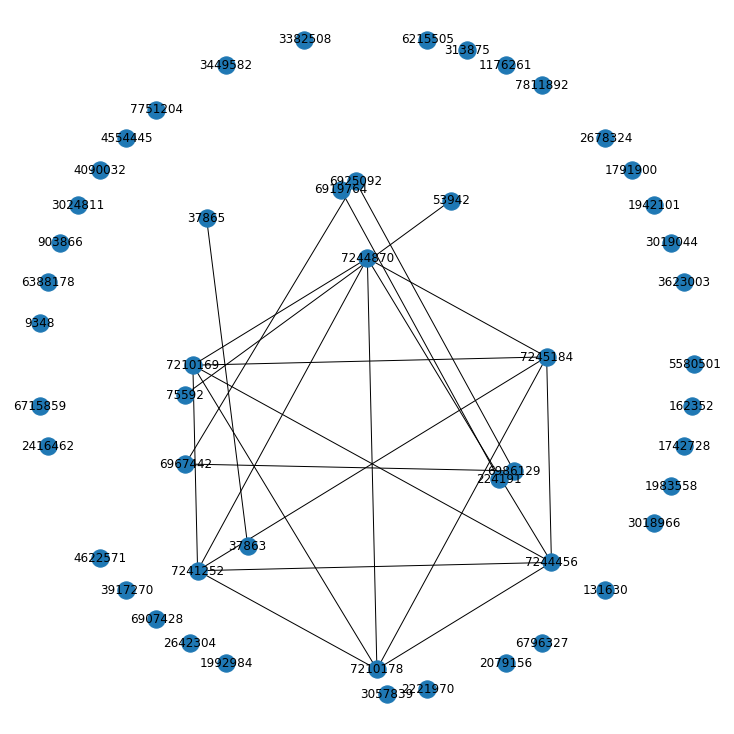

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
%matplotlib inline
plt.figure(figsize=(10,10))
nx.draw_kamada_kawai(ng, with_labels=True)

## Teams of 3 or more, more than 10 competitions


In [ ]:
t=sf.groupby("TeamId",{'num_members':tc.aggregate.COUNT_DISTINCT('UserId'), 'team_members':tc.aggregate.DISTINCT('UserId')})
t.materialize()
t3=t[t["num_members"]>=3]
t3.materialize()
t3


Columns:
	TeamId	int
	num_members	int
	team_members	list

Rows: 32607

Data:
+---------+-------------+-------------------------------+
|  TeamId | num_members |          team_members         |
+---------+-------------+-------------------------------+
| 3233923 |      3      |   [101869, 3089602, 2153461]  |
| 2401702 |      4      | [848561, 1399149, 2505490,... |
| 3832254 |      5      | [2123574, 3894974, 3700960... |
| 3019578 |      3      |    [275564, 660302, 959829]   |
| 1849920 |      5      | [2036518, 1184633, 1269465... |
| 6702223 |      4      | [6244351, 7175161, 5967231... |
|  127041 |      5      | [247881, 260668, 263473, 2... |
| 2356828 |      3      |  [2162403, 2483000, 2505388]  |
| 5130154 |      3      |  [5176527, 5307155, 4302971]  |
| 5558794 |      3      |  [5805802, 5255746, 5773226]  |
+---------+-------------+-------------------------------+
[32607 rows x 3 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

In [ ]:
t3["team_set"]=t3["team_members"].apply(lambda x:set(x))
t3.materialize()
t3

Columns:
	TeamId	int
	num_members	int
	team_members	list
	team_set	array

Rows: 32607

Data:
+---------+-------------+-------------------------------+
|  TeamId | num_members |          team_members         |
+---------+-------------+-------------------------------+
| 3233923 |      3      |   [101869, 3089602, 2153461]  |
| 2401702 |      4      | [848561, 1399149, 2505490,... |
| 3832254 |      5      | [2123574, 3894974, 3700960... |
| 3019578 |      3      |    [275564, 660302, 959829]   |
| 1849920 |      5      | [2036518, 1184633, 1269465... |
| 6702223 |      4      | [6244351, 7175161, 5967231... |
|  127041 |      5      | [247881, 260668, 263473, 2... |
| 2356828 |      3      |  [2162403, 2483000, 2505388]  |
| 5130154 |      3      |  [5176527, 5307155, 4302971]  |
| 5558794 |      3      |  [5805802, 5255746, 5773226]  |
+---------+-------------+-------------------------------+
+--------------------------------+
|            team_set            |
+--------------------------------+
| [2153461.0, 3089602.0, 101...  |
| [2511952.0, 848561.0, 2505...  |
| [3700960.0, 3894916.0, 770...  |
| [275564.0, 959829.0, 660302.0] |
| [2036518.0, 1537966.0, 126...  |
| [7175161.0, 5967231.0, 638...  |
| [249187.0, 247881.0, 26126...  |
| [2483000.0, 2162403.0, 250...  |
| [4302971.0, 5307155.0, 517...  |
| [5773226.0, 5805802.0, 525...  |
+--------------------------------+
[32607 rows x 4 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

In [ ]:
#test
set1=set([1,2,3])
set2=set([1,3,2])
set3=set([1])
print(set1==set2)
print(set1==set3)
print(set3==set2)

True
False
False


In [ ]:
counting_team_apearance=t3.groupby("team_set",{"count":tc.aggregate.COUNT()})
counting_team_apearance.materialize()
counting_team_apearance.sort("count",ascending=False)

Columns:
	team_set	array
	count	int

Rows: 30036

Data:
+--------------------------------+-------+
|            team_set            | count |
+--------------------------------+-------+
| [4471048.0, 4662098.0, 464...  |   12  |
| [4041944.0, 4766441.0, 478...  |   11  |
| [4615104.0, 3594546.0, 359...  |   10  |
| [4439585.0, 5904195.0, 590...  |   10  |
|  [13656.0, 13652.0, 13343.0]   |   10  |
| [2060096.0, 5589321.0, 432...  |   9   |
| [223160.0, 251266.0, 258363.0] |   8   |
| [5307813.0, 6425520.0, 642...  |   8   |
| [5779936.0, 5779367.0, 577...  |   8   |
| [6396056.0, 3954379.0, 161...  |   8   |
+--------------------------------+-------+
[30036 rows x 2 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

In [ ]:
competitions_10_team_3=counting_team_apearance[counting_team_apearance["count"]>10]
competitions_10_team_3.materialize()
competitions_10_team_3

Columns:
	team_set	array
	count	int

Rows: 2

Data:
+-------------------------------+-------+
|            team_set           | count |
+-------------------------------+-------+
| [4041944.0, 4766441.0, 478... |   11  |
| [4471048.0, 4662098.0, 464... |   12  |
+-------------------------------+-------+
[2 rows x 2 columns]

### Discussion
exactly 2 teams were found with 3 or more users, and more than 10 competitions

## Forum topics
What is a topic? common practices in NLP and what we learn in the class use LDA methods, but they don't always allign with our intuition on the subject.
Perosnlayy I am more interested with supervised topic modeling which appears [here](Topic modeling of multimodal data: an autoregressive approach) as an example.

That said, I will continue with the usual LDA for now..

### 

In [13]:
import networkx as nx
import turicreate as tc 
import pandas as pd
import numpy as np

In [11]:
df=pd.read_csv("/content/datasets/kaggle_meta/ForumMessages.csv", encoding='latin-1')
df=df[["Message","PostDate"]]
df["Message"]=df["Message"].astype(str)

In [12]:
sf=tc.SFrame(df)
sf

Columns:
	Message	str
	PostDate	str

Rows: 1424904

Data:
+-------------------------------+---------------------+
|            Message            |       PostDate      |
+-------------------------------+---------------------+
| Here are some papers that ... | 05/12/2010 04:39:30 |
| More research... enjoy<br>... | 05/12/2010 04:39:30 |
| Is there a time order betw... | 12/01/2010 21:46:53 |
| Is group joining allowed i... | 09/17/2010 21:00:22 |
| Jorge, what do you mean by... | 09/17/2010 21:00:22 |
| I mean get groups together... | 09/17/2010 21:00:22 |
| So you want to combine tea... | 09/17/2010 21:00:22 |
| Hi all,<br><br>Just to let... | 10/24/2010 23:38:59 |
| Hmmm...<div><br></div><div... | 10/24/2010 23:38:59 |
| Apologies, I hadn't antipi... | 10/24/2010 23:38:59 |
+-------------------------------+---------------------+
[1424904 rows x 2 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

In [14]:
sf['text'] = sf["Message"].apply(lambda x: x.lower())
sf.materialize()
sf

Columns:
	Message	str
	PostDate	str
	text	str

Rows: 1424904

Data:
+-------------------------------+---------------------+
|            Message            |       PostDate      |
+-------------------------------+---------------------+
| Here are some papers that ... | 05/12/2010 04:39:30 |
| More research... enjoy<br>... | 05/12/2010 04:39:30 |
| Is there a time order betw... | 12/01/2010 21:46:53 |
| Is group joining allowed i... | 09/17/2010 21:00:22 |
| Jorge, what do you mean by... | 09/17/2010 21:00:22 |
| I mean get groups together... | 09/17/2010 21:00:22 |
| So you want to combine tea... | 09/17/2010 21:00:22 |
| Hi all,<br><br>Just to let... | 10/24/2010 23:38:59 |
| Hmmm...<div><br></div><div... | 10/24/2010 23:38:59 |
| Apologies, I hadn't antipi... | 10/24/2010 23:38:59 |
+-------------------------------+---------------------+
+-------------------------------+
|              text             |
+-------------------------------+
| here are some papers that ... |
| more research... enjoy<br>... |
| is there a time order betw... |
| is group joining allowed i... |
| jorge, what do you mean by... |
| i mean get groups together... |
| so you want to combine tea... |
| hi all,<br><br>just to let... |
| hmmm...<div><br></div><div... |
| apologies, i hadn't antipi... |
+-------------------------------+
[1424904 rows x 3 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

In [ ]:
from nltk.stem.porter import *
stemmer = PorterStemmer()
import re
from collections import Counter
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words_set = set(stopwords.words("english"))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
txt = "\n".join(sf['text'])

In [ ]:
from nltk.stem.porter import *
from functools import lru_cache

def skip_word(w):
    if len(w) < 2 or w in stop_words_set:
        return True
    return False
stemmer = PorterStemmer()

#Using cahcing for faster performence
@lru_cache(maxsize=None)
def word_stemming(w):
    return stemmer.stem(w)

l = [word_stemming(w) for w in re.findall(r"(\w+)", txt) if not skip_word(w) ]
d = Counter(l)

In [ ]:
def skip_word2(w):
    if len(w) <2:
        return True
    if w.isdigit():
        return True
    if w in stop_words_set or stemmer.stem(w) in stop_words_set:
        return True
    return False

stop_words_set |= {k for k,v in d.items() if v > 20000}


In [ ]:
!pip install gensim
!pip install pyLDAvis

In [ ]:
small_sf=sf[:1000]
small_sf

Columns:
	Message	str
	PostDate	str
	text	str

Rows: 1000

Data:
+-------------------------------+---------------------+
|            Message            |       PostDate      |
+-------------------------------+---------------------+
| Here are some papers that ... | 05/12/2010 04:39:30 |
| More research... enjoy<br>... | 05/12/2010 04:39:30 |
| Is there a time order betw... | 12/01/2010 21:46:53 |
| Hi all,<br><br>Just to let... | 10/24/2010 23:38:59 |
| Hmmm...<div><br></div><div... | 10/24/2010 23:38:59 |
| Apologies, I hadn't antipi... | 10/24/2010 23:38:59 |
| Anthony, thank you for und... | 10/24/2010 23:38:59 |
| Just another comment: we h... | 10/24/2010 23:38:59 |
| Hi Philipp,<br><br>The Che... | 10/24/2010 23:38:59 |
| Jeff, we must have posted ... | 10/24/2010 23:38:59 |
+-------------------------------+---------------------+
+-------------------------------+
|              text             |
+-------------------------------+
| here are some papers that ... |
| more research... enjoy<br>... |
| is there a time order betw... |
| hi all,<br><br>just to let... |
| hmmm...<div><br></div><div... |
| apologies, i hadn't antipi... |
| anthony, thank you for und... |
| just another comment: we h... |
| hi philipp,<br><br>the che... |
| jeff, we must have posted ... |
+-------------------------------+
[1000 rows x 3 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

In [ ]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

docs = small_sf['text'].apply(lambda txt: [stemmer.stem(w) for w in re.findall(r"(\w+)", txt) if not skip_word2(w)])
docs = docs.apply(lambda l: [w for w in l if not skip_word2(w)])

# Converting the data to work in Gensim

id2word = corpora.Dictionary(docs)
corpus = [id2word.doc2bow(text) for text in docs]
print(corpus[:1])

[[(0, 1), (1, 4), (2, 1), (3, 1), (4, 4), (5, 8), (6, 1), (7, 1), (8, 4), (9, 3), (10, 1), (11, 4), (12, 4), (13, 1), (14, 8), (15, 1), (16, 1), (17, 1), (18, 1), (19, 4), (20, 4), (21, 1), (22, 1), (23, 4), (24, 4), (25, 1), (26, 8), (27, 2), (28, 4), (29, 4), (30, 1), (31, 1), (32, 1), (33, 1), (34, 4), (35, 3), (36, 1), (37, 4), (38, 4), (39, 4), (40, 3)]]


In [ ]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           update_every=0,
                                           chunksize=500,
                                           alpha='auto',
                                           per_word_topics=True)

### Visualiztion of all topics

In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, id2word)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7     -0.339458 -0.003046       1        1  50.957928
0      0.130493  0.188023       2        1   7.398065
5      0.155379 -0.019599       3        1   3.792569
10    -0.037227  0.025162       4        1   3.248212
9      0.125420 -0.122735       5        1   3.126913
13     0.180191  0.035284       6        1   3.058109
6      0.173403 -0.051581       7        1   2.686284
2     -0.073757  0.002174       8        1   2.649448
8     -0.209574 -0.022063       9        1   2.634192
17     0.043668 -0.131571      10        1   2.617400
18     0.189125 -0.058029      11        1   2.603374
4     -0.019686 -0.075083      12        1   2.459677
16    -0.037163  0.042946      13        1   2.015576
11     0.201668  0.015907      14        1   2.008831
15    -0.173182 -0.003965      15        1   1.985479
14     0.066966  0.015655      16        1   1.699685
1     -0.134134 -0.032127      17        1   1.481719
12    -0.063330  0.114416      18        1   1.268209
19    -0.173894 -0.042338      19        1   1.250848
3     -0.004909  0.122570      20        1   1.057481, topic_info=        Term         Freq        Total Category  logprob  loglift
1063    font  5269.000000  5269.000000  Default  30.0000  30.0000
1119     mso  2064.000000  2064.000000  Default  29.0000  29.0000
817    style  2485.000000  2485.000000  Default  28.0000  28.0000
1090     0pt  1617.000000  1617.000000  Default  27.0000  27.0000
1097      ca  1864.000000  1864.000000  Default  26.0000  26.0000
...      ...          ...          ...      ...      ...      ...
1092   align     2.870028   214.661125  Topic20  -5.3353   0.2345
1138  height     3.076656   697.155670  Topic20  -5.2658  -0.8739
1093    ansi     3.138472   902.179532  Topic20  -5.2459  -1.1118
1116  margin     3.014376  1174.151998  Topic20  -5.2863  -1.4156
1094   arial     2.653176   225.810351  Topic20  -5.4139   0.1053

[1499 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
4050      9  0.688937     004dbb
3772     14  0.610037  0cdkqfjad
1136      1  0.834652        0cm
1136      2  0.009322        0cm
1136      3  0.001864        0cm
...     ...       ...        ...
4678     10  0.746637      zhang
3868      6  0.645992       zoom
2515      6  0.251264         îµ
2515     16  0.502527         îµ
4168     10  0.749681         ï¼

[3786 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 1, 6, 11, 10, 14, 7, 3, 9, 18, 19, 5, 17, 12, 16, 15, 2, 13, 20, 4])

Temporal analysis of topics

In [18]:
sf["date"]=sf["PostDate"].str_to_datetime("%m/%d/%Y %H:%M:%S")

In [19]:
sf["year"]=sf["date"].apply(lambda x: x.year)
sf.materialize()
print(sf["year"].max())
print(sf["year"].min())
sf

2022
2010


Columns:
	Message	str
	PostDate	str
	text	str
	date	datetime
	year	int

Rows: 1424904

Data:
+-------------------------------+---------------------+
|            Message            |       PostDate      |
+-------------------------------+---------------------+
| Here are some papers that ... | 05/12/2010 04:39:30 |
| More research... enjoy<br>... | 05/12/2010 04:39:30 |
| Is there a time order betw... | 12/01/2010 21:46:53 |
| Is group joining allowed i... | 09/17/2010 21:00:22 |
| Jorge, what do you mean by... | 09/17/2010 21:00:22 |
| I mean get groups together... | 09/17/2010 21:00:22 |
| So you want to combine tea... | 09/17/2010 21:00:22 |
| Hi all,<br><br>Just to let... | 10/24/2010 23:38:59 |
| Hmmm...<div><br></div><div... | 10/24/2010 23:38:59 |
| Apologies, I hadn't antipi... | 10/24/2010 23:38:59 |
+-------------------------------+---------------------+
+-------------------------------+---------------------+------+
|              text             |         date        | year |
+-------------------------------+---------------------+------+
| here are some papers that ... | 2010-05-12 04:39:30 | 2010 |
| more research... enjoy<br>... | 2010-05-12 04:39:30 | 2010 |
| is there a time order betw... | 2010-12-01 21:46:53 | 2010 |
| is group joining allowed i... | 2010-09-17 21:00:22 | 2010 |
| jorge, what do you mean by... | 2010-09-17 21:00:22 | 2010 |
| i mean get groups together... | 2010-09-17 21:00:22 | 2010 |
| so you want to combine tea... | 2010-09-17 21:00:22 | 2010 |
| hi all,<br><br>just to let... | 2010-10-24 23:38:59 | 2010 |
| hmmm...<div><br></div><div... | 2010-10-24 23:38:59 | 2010 |
| apologies, i hadn't antipi... | 2010-10-24 23:38:59 | 2010 |
+-------------------------------+---------------------+------+
[1424904 rows x 5 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

### Temporal evaluation of topics- infinte resources
I would extract the 10 most common topics in the first year of the data, with 2 descriptive words of each topic, and I would repeat the process for each year. 
I would plot all 20 words with an interactive graph.


In [ ]:
sf_2010=sf[sf["year"]==2010]

In [5]:
def Get_Topics_For_Year(sf_year):
  small_sf=sf_year[:1000]
  docs = small_sf['text'].apply(lambda txt: [stemmer.stem(w) for w in re.findall(r"(\w+)", txt) if not skip_word2(w)])
  docs = docs.apply(lambda l: [w for w in l if not skip_word2(w)])
  id2word = corpora.Dictionary(docs)
  corpus = [id2word.doc2bow(text) for text in docs]
  lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5, 
                                           update_every=0,
                                           chunksize=500,
                                           alpha='auto',
                                           per_word_topics=True)
  topics=lda_model.print_topics()
  words_multiple_list=[re.findall(r"[a-zA-Z]+",topics[i][1]) for i in range(len(topics))]
  words_list=[item for sublist in words_multiple_list for item in sublist if len(item)>3]
  return words_list

In [ ]:
topics_2010=Get_Topics_For_Year(sf_2010)


In [ ]:
topics_2010

['font',
 'style',
 'border',
 'height',
 'border',
 'style',
 'bottom',
 'font',
 'transpar',
 'left',
 'color',
 'famili',
 'border',
 'font',
 'style',
 'famili',
 'background',
 'color',
 'transpar',
 'left',
 'player',
 'rmse',
 'font',
 'bogu',
 'system',
 'player',
 'cross',
 'game',
 'font',
 'style',
 'calibri',
 'languag',
 'margin']

### Prototype- counting
I take the most common words in a topic- as the topic name, and then I count it's direct occuarances

In [132]:
selected_topics=["languag","game","system", "color", "family"]

In [ ]:
from tqdm import tqdm
years=range(2010,2020)
topic_count=[]
for y in tqdm(years):
  sf_year=sf[sf["year"]==y]
  sf_small=sf_year[:5000]
  txt=" ".join(sf_small["text"])
  ct={}
  for topic in selected_topics:
    c=txt.count(topic)
    ct[topic]=c
  topic_count.append(ct)
  


100%|██████████| 10/10 [00:13<00:00,  1.37s/it]


In [ ]:
df=pd.DataFrame().from_records(topic_count)
for index, row in df.iterrows():#normalize
  df.iloc[index]=df.iloc[index]/row.sum()
df["year"]=years
df

languag      game    system     color    family  year
0  0.230807  0.090819  0.048378  0.347448  0.282548  2010
1  0.035356  0.154324  0.111323  0.287625  0.411371  2011
2  0.132612  0.067659  0.387009  0.208390  0.204330  2012
3  0.173214  0.053571  0.439286  0.141071  0.192857  2013
4  0.105556  0.551852  0.274074  0.053704  0.014815  2014
5  0.122951  0.521858  0.265027  0.065574  0.024590  2015
6  0.052893  0.355372  0.411570  0.085950  0.094215  2016
7  0.327536  0.292754  0.286957  0.084058  0.008696  2017
8  0.207977  0.304843  0.227920  0.242165  0.017094  2018
9  0.095455  0.359091  0.340909  0.172727  0.031818  2019

In [ ]:
melt=df.melt(id_vars="year", var_name="topic")
melt[:3]

year    topic     value
0  2010  languag  0.230807
1  2011  languag  0.035356
2  2012  languag  0.132612

In [ ]:
!pip install plotly --upgrade


     |████████████████████████████████| 26.5 MB 43.4 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [ ]:
%matplotlib inline
import plotly as py
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
px.line(melt, x="year", y="value", color="topic")

### Discussion
I used a subsample of the data (5000) posts each year- and only analyzed topics that appeared directly without more complex language models. <br>
We can still see patterns: the spike in games at 2014, and of systems in 2012. 

## Programming language and packages of code

### Infinite resorces- 
scraping websites such as github and stack overflow to get a list of most common programming languages and packages in each language. Then simple brute force counting the their occurances in all of the forums.

### Prototype
I got a list of programming languages from [statistics times](https://statisticstimes.com/tech/top-computer-languages.php)




In [27]:
prog_list=["Python","Java","JavaScript","C#"," C ","C++","PHP"," R ","Swift","Objective","Matlab","TypeScript","Go","Kotlin","VBA","Rust","Rubi","Ada", "Scala","Dart","Abap","Visual Basic","Groovy","Julia","Perl","Haskell","Cobol"]
prog_list=[a.lower() for a in prog_list]
len(prog_list)

27

In [28]:
from collections import Counter

In [106]:
def Count_Ocurrances(sfe,year,max_len=1000000):
  sf_year=sfe[sfe["year"]==year]
  sf_small=sf_year[:max_len]
  sf_small.materialize()

  c=Counter(" ".join(sf_small["text"]).split(" "))
  return c

In [107]:
c=Count_Ocurrances(sf,2010)

In [108]:
prog_year={key:c[key] for key in prog_list}
prog_year

{' c ': 0,
 ' r ': 0,
 'abap': 0,
 'ada': 0,
 'c#': 9,
 'c++': 5,
 'cobol': 0,
 'dart': 0,
 'go': 50,
 'groovy': 1,
 'haskell': 0,
 'java': 11,
 'javascript': 0,
 'julia': 0,
 'kotlin': 0,
 'matlab': 5,
 'objective': 1,
 'perl': 7,
 'php': 8,
 'python': 18,
 'rubi': 0,
 'rust': 0,
 'scala': 0,
 'swift': 0,
 'typescript': 0,
 'vba': 1,
 'visual basic': 0}

In [109]:
topics=tc.SFrame().read_csv("/content/datasets/kaggle_meta/ForumTopics.csv")
topics

Unexpected characters after last column. ""1"
"52814""
Parse failed at token ending at: 
	tion.hash.slice(1)), //","False","0","	-3","2","1"
"52814",^"2239","","301901","301901","03/23/2018 12:43:52
Successfully parsed 13 tokens: 
	0: 52790
	1: 14227
	2: 
	3: 301716
	4: 301715
	5: 03/23/2018 06:30:35
	6: 03/23/2018 06:31:47
	7: "
	8: //"
	9: False
	10: 0
	11: -3
	12: 2

1 lines failed to parse correctly

Finished parsing file /content/datasets/kaggle_meta/ForumTopics.csv

Parsing completed. Parsed 100 lines in 0.915076 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,int,str,int,int,str,str,str,str,int,int,int,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Unable to interpret """" as a integer
Parse failed at token ending at: 
	"212764","15","","",^"1160763","01/20/2021 05:34:26","01/20/2021 05:34:26","Image Dataset Rosacea and Acne Vulgaris","False","0","0","0","0"
Successfully parsed 3 tokens: 
	0: 212764
	1: 15
	2:

Unable to interpret """" as a integer
Parse failed at token ending at: 
	"254246","16860","13206593","",^"","07/20/2021 20:26:00","07/20/2021 20:26:00","","False","0","0","0","0"
Successfully parsed 3 tokens: 
	0: 254246
	1: 16860
	2: 13206593

Unable to interpret """" as a integer
Parse failed at token ending at: 
	"230798","16860","15577429","",^"","04/05/2021 18:10:09","04/05/2021 18:10:09","","False","0","11","0","0"
Successfully parsed 3 tokens: 
	0: 230798
	1: 16860
	2: 15577429

Unable to interpret """" as a integer
Parse failed at token ending at: 
	"235672","16860","14029125","",^"","04/30/2021 16:58:08","04/30/2021 16:58:08","","False","0","0","0","0"
Successfully parsed 3 tokens: 
	0: 235672
	1: 16860
	2: 14029125

Unable to interpret """" as a integer
Parse failed at token ending at: 
	"226832","16860","15405876","",^"","03/17/2021 20:52:49","03/17/2021 20:52:49","","False","0","2","0","0"
Successfully parsed 3 tokens: 
	0: 226832
	1: 16860
	2: 15405876

Unable to interpret """" as a integer
Parse failed at token ending at: 
	"203152","16860","8400894","1111730","",^"12/14/2020 01:48:39","12/14/2020 01:48:39","","False","0","0","1","1"
Successfully parsed 4 tokens: 
	0: 203152
	1: 16860
	2: 8400894
	3: 1111730

Unable to interpret """" as a integer
Parse failed at token ending at: 
	"235827","16860","16650912","",^"","05/01/2021 12:18:58","05/01/2021 12:18:58","","False","0","4","0","0"
Successfully parsed 3 tokens: 
	0: 235827
	1: 16860
	2: 16650912

Unable to interpret """" as a integer
Parse failed at token ending at: 
	"241229","16860","17152296","",^"","05/23/2021 16:14:56","05/23/2021 16:14:56","","False","0","3","0","0"
Successfully parsed 3 tokens: 
	0: 241229
	1: 16860
	2: 17152296

Unable to interpret """" as a integer
Parse failed at token ending at: 
	"228679","16860","1129161","",^"","03/25/2021 19:53:14","03/25/2021 19:53:14","","False","0","0","0","0"
Successfully parsed 3 tokens: 
	0: 228679
	1: 16860
	2: 1129161

Unable to interpret """" as a integer
Parse failed at token ending at: 
	"191753","16860","11743462","1052918","",^"10/18/2020 12:27:08","10/18/2020 12:27:08","","False","0","27","1","1"
Successfully parsed 4 tokens: 
	0: 191753
	1: 16860
	2: 11743462
	3: 1052918

1230 lines failed to parse correctly

Finished parsing file /content/datasets/kaggle_meta/ForumTopics.csv

Parsing completed. Parsed 153746 lines in 0.589947 secs.

Columns:
	Id	int
	ForumId	int
	KernelId	str
	LastForumMessageId	int
	FirstForumMessageId	int
	CreationDate	str
	LastCommentDate	str
	Title	str
	IsSticky	str
	TotalViews	int
	Score	int
	TotalMessages	int
	TotalReplies	int

Rows: 153746

Data:
+-----+---------+----------+--------------------+---------------------+
|  Id | ForumId | KernelId | LastForumMessageId | FirstForumMessageId |
+-----+---------+----------+--------------------+---------------------+
|  7  |    1    |          |         14         |          14         |
|  28 |    4    |          |        100         |          97         |
|  42 |    4    |          |        367         |         182         |
|  44 |    4    |          |        202         |         199         |
|  54 |    18   |          |      1284512       |         248         |
|  57 |    18   |          |        285         |         284         |
|  64 |    15   |          |        536         |         348         |
|  80 |    18   |          |        493         |         465         |
| 103 |    4    |          |        693         |         682         |
| 117 |    18   |          |        1267        |         782         |
+-----+---------+----------+--------------------+---------------------+
+---------------------+---------------------+-------------------------------+
|     CreationDate    |   LastCommentDate   |             Title             |
+---------------------+---------------------+-------------------------------+
| 05/02/2010 14:37:35 | 05/02/2010 14:37:35 |      Technique Discussion     |
| 06/22/2010 13:10:43 | 06/22/2010 13:10:43 | non numeric data in Variab... |
| 07/22/2010 18:17:01 | 07/22/2010 18:17:01 |        Target variable?       |
| 07/27/2010 11:46:17 | 07/27/2010 11:46:17 | confusion with structure o... |
| 08/07/2010 05:04:01 | 04/26/2021 03:15:29 | Avoiding the daily submiss... |
| 08/09/2010 09:23:12 | 08/09/2010 09:23:12 | questions about the data(o... |
| 08/13/2010 09:32:14 | 08/13/2010 09:32:14 |     Alzheimer's Challenge     |
| 08/20/2010 23:25:02 | 08/20/2010 23:25:02 | Public leaderboard score f... |
| 09/07/2010 18:54:36 | 09/07/2010 18:54:36 | A couple of questions abou... |
| 09/21/2010 00:48:54 | 09/21/2010 00:48:54 |    Cross Validation Dataset   |
+---------------------+---------------------+-------------------------------+
+----------+------------+-------+---------------+--------------+
| IsSticky | TotalViews | Score | TotalMessages | TotalReplies |
+----------+------------+-------+---------------+--------------+
|  False   |    1869    |   0   |       1       |      0       |
|  False   |    2666    |   0   |       3       |      2       |
|  False   |    2507    |   0   |       5       |      4       |
|  False   |    1794    |   0   |       4       |      3       |
|  False   |    7463    |   0   |       23      |      22      |
|  False   |    1402    |   0   |       2       |      1       |
|  False   |    5697    |   0   |       5       |      4       |
|  False   |    3911    |   0   |       12      |      11      |
|  False   |    2250    |   0   |       3       |      2       |
|  False   |   12094    |   0   |       26      |      25      |
+----------+------------+-------+---------------+--------------+
[153746 rows x 13 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

In [110]:
topics=topics[["Title","CreationDate"]]
topics['text'] = topics["Title"].apply(lambda x: x.lower())
topics["date"]=topics["CreationDate"].str_to_datetime("%m/%d/%Y %H:%M:%S")
topics["year"]=[t.year for t in topics["date"]]
topics.materialize()

In [111]:
c_t=Count_Ocurrances(topics,2010)

In [112]:
prog_year_t={key:c_t[key] for key in prog_list}
prog_year_t

{' c ': 0,
 ' r ': 0,
 'abap': 0,
 'ada': 0,
 'c#': 1,
 'c++': 0,
 'cobol': 0,
 'dart': 0,
 'go': 0,
 'groovy': 0,
 'haskell': 0,
 'java': 0,
 'javascript': 0,
 'julia': 0,
 'kotlin': 0,
 'matlab': 0,
 'objective': 0,
 'perl': 0,
 'php': 1,
 'python': 2,
 'rubi': 0,
 'rust': 0,
 'scala': 0,
 'swift': 0,
 'typescript': 0,
 'vba': 0,
 'visual basic': 0}

### Stop and think


In [113]:
print("sum of languages in forums: {}".format(sum(prog_year.values())))
print("sum of languages in topics: {}".format(sum(prog_year_t.values())))

sum of languages in forums: 116
sum of languages in topics: 4


So forum text is more indicative than titles.

In [115]:
from tqdm import tqdm
word_count=[]
prog_count=[]
for year in tqdm(range(2010,2021)):
  c=Count_Ocurrances(sf,year)
  word_count.append(c)
  prog_year={key:c[key] for key in prog_list}
  prog_count.append(prog_year)


100%|██████████| 11/11 [00:38<00:00,  3.47s/it]


In [72]:
!pip install plotly --upgrade
%matplotlib inline
import plotly as py
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [116]:
df=pd.DataFrame().from_records(prog_count)
for i in range(len(df)):
  df.iloc[i]=df.iloc[i]/df.iloc[i].sum()
df["year"]=range(2010,2021)
melt=df.melt(id_vars="year",var_name="programming language")
df

python      java  javascript  ...   haskell     cobol  year
0   0.155172  0.094828    0.000000  ...  0.000000  0.000000  2010
1   0.102778  0.038889    0.011111  ...  0.000000  0.000000  2011
2   0.269784  0.070144    0.003597  ...  0.000000  0.000000  2012
3   0.461806  0.032639    0.002778  ...  0.000694  0.000000  2013
4   0.446208  0.047619    0.002352  ...  0.000000  0.000000  2014
5   0.463369  0.028263    0.004091  ...  0.000744  0.001116  2015
6   0.462613  0.014790    0.006847  ...  0.000000  0.000000  2016
7   0.503331  0.022531    0.007053  ...  0.000588  0.000196  2017
8   0.480364  0.009268    0.005498  ...  0.000157  0.000157  2018
9   0.464955  0.007495    0.004719  ...  0.000139  0.000000  2019
10  0.475590  0.013362    0.011795  ...  0.000075  0.000149  2020

[11 rows x 28 columns]

In [118]:
px.line(melt,x="year", y="value", color="programming language")

### Python is a clear winner
note because of effective implementation- we could analyse a million messages in each year

### Infinte resorces for language packages
construct a comprehensive list of programing packages and their aliaces (e.g scikit learn- sklearn)- and then count the occurances.

### Prototype
based on python list from this [website](https://blog.octachart.com/top-50-important-python-libraries)

In [119]:
pack=["NLTK","TextBlob","Gensim","OpenCV","Pillow","PyTesseract","Tkinter","wxPython" "PyQT","Pygame","Pyglet","Requests", "Scrapy","BeautifulSoup","Django","Flask","Pandas","Matplotlib","Plotly","Bokeh","SQLAlchemy","Numpy","SciPy","SymPy", "Keras","Tensorflow","PyTorch","Scikit-Learn","sklearn","Imbalanced-learn","Theano","LightGBM","Eli5","PySoundFile","Mutagen","Seaborn","IPython"]
pack=[a.lower() for a in pack]
len(pack)

36

In [ ]:
  word_count.append(c)
  prog_year={key:c[key] for key in prog_list}
  prog_count.append(prog_year)


In [126]:
pack_count=[]
for c in word_count:
  pack_year={key:c[key] for key in pack}
  pack_count.append(pack_year)

In [130]:
df=pd.DataFrame().from_records(pack_count)
for i in range(len(df)):
  df.iloc[i]=df.iloc[i]/df.iloc[i].sum()
df["year"]=range(2010,2021)
melt=df.melt(id_vars="year",var_name="package")
df

nltk  textblob    gensim    opencv  ...  mutagen   seaborn   ipython  year
0   0.000000  0.000000  0.000000  0.000000  ...      0.0  0.000000  0.000000  2010
1   0.000000  0.000000  0.000000  0.214286  ...      0.0  0.000000  0.000000  2011
2   0.074074  0.000000  0.012346  0.049383  ...      0.0  0.000000  0.000000  2012
3   0.041394  0.000000  0.004357  0.015251  ...      0.0  0.000000  0.045752  2013
4   0.014311  0.000000  0.008945  0.042934  ...      0.0  0.000000  0.062612  2014
5   0.018836  0.000000  0.023116  0.042808  ...      0.0  0.001712  0.069349  2015
6   0.015887  0.001816  0.005447  0.030867  ...      0.0  0.018157  0.034044  2016
7   0.014136  0.000912  0.006612  0.015504  ...      0.0  0.020748  0.015276  2017
8   0.005629  0.003259  0.004148  0.007851  ...      0.0  0.021330  0.012443  2018
9   0.007123  0.001583  0.002770  0.011872  ...      0.0  0.027437  0.002111  2019
10  0.006749  0.001227  0.001841  0.017043  ...      0.0  0.034085  0.003681  2020

[11 rows x 37 columns]

In [131]:
px.line(melt,x="year", y="value", color="package")

# Question 3- Olimpic Games

## Unlimited resorces
what are remarkable achievments? breaking world records? if so a simple brute force would be getting a list of world records from [world athletics](https://www.worldathletics.org/records/by-category/world-records), and comparing the Olimpics results to that.
the olympics actually have a [website](https://olympics.com/en/olympic-games/tokyo-2020/results/) with results. Unfortunatly, in many sports they only show the athlete rank, rather than their absolute performance (e.g marathon runnimg time). More over it's dynamic so scraping it is possible but exhausting.

The [bbc](https://www.bbc.com/sport/olympics/57840433) website has better source of olympics scores, but still needs scraping and cleaning to extract all of the data.

# Prototype- womans marathons


In [134]:
url="https://www.bbc.com/sport/olympics/58124599"

'<html lang="en-GB" class="b-reith-sans-font">\n  <head>\n    <script>window.Morph = {}</script>\n<script type="text/javascript">Morph.markPerformance = function(label) { if(window.performance && window.performance.mark) { window.performance.mark(label); } }; Morph.versions = {}; Morph.modules = {}; Morph.config = { cdn: "m.files.bbci.co.uk", pushEnv: "live" }; Morph.styles = {}; Morph.styleSrc = []; Morph.toInit = {bundles: [], registers: [], payloads: []};   Morph.initStyles = function() { if (!Morph.enhanced) { var eles = Array.prototype.slice.call(document.getElementsByTagName(\'noscript\')); for (var i = 0, len = eles.length; i<len; i++) { if (eles[i].className === \'morph-core-style\') { document.write(eles[i].innerText); eles[i].parentNode.removeChild(eles[i]); } } return; } for (var j = 0, jLen = Morph.styleSrc.length; j<jLen; j++) { document.write(Morph.styleSrc[j]); } Morph.styleSrc = []; };</script>\n<script type="text/javascript">Morph.forceCore = window.location.search.ind
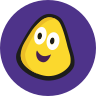

In [146]:
import requests
s = requests.get(url).content.decode('utf-8')
s

In [147]:
import re

In [170]:
#get time
time_list=re.findall("2:\d\d:\d\d",s)
#get names
names_list_messy=re.findall("[A-Z]{4}[\w\s]+</span>",s)
names_list=[a.replace("</span>","") for a in names_list_messy]
time_list=time_list[:len(names_list)]
df=pd.DataFrame()
df["name"]=names_list
df["time"]=time_list
df

name     time
0         JEPCHIRCHIR Peres  2:27:20
1             KOSGEI Brigid  2:27:36
2              SEIDEL Molly  2:27:46
3               DEREJE Roza  2:28:38
4           MAZURONAK Volha  2:29:06
5        KEJETA Melat Yisak  2:29:16
6   CHUMBA Eunice Chebichii  2:29:36
7              ICHIYAMA Mao  2:30:13
8            ELMORE Malindi  2:30:59
9              DIVER Sinead  2:31:14
10         JOHANNES Helalia  2:31:22
11        SCHLUMPF Fabienne  2:31:36
12            WODAK Natasha  2:31:41
13        NADOLSKA Karolina  2:32:04
14              STEYN Gerda  2:32:10
15      CHEMUTAI Immaculate  2:32:23
16            KIPYEGO Sally  2:32:53
17       SCHONEBORN Deborah  2:33:08
18             SUZUKI Ayuko  2:33:14
19           KHATALA Neheng  2:33:15
20      PARLOV KOSTRO Matea  2:33:18
21        WIKSTROM Carolina  2:33:19
22            PASHLEY Ellie  2:33:39
23          MATANGA Failuna  2:33:58
24        CORMACK Fionnuala  2:34:09
25           WEIGHTMAN Lisa  2:34:19
26            TEJEDA Gladys  2:34:21
27           GORISSEN Mieke  2:34:24
28               LOYO Elena  2:34:38
29             ROCHA Salome  2:34:52
30      STEINRUCK Katharina  2:35:00
31            EPIS Giovanna  2:35:09
32             MAEDA Honami  2:35:28
33            CHOI Kyungsun  2:35:33
34      LISOWSKA Aleksandra  2:35:33
35            MASLOVA Darya  2:35:35
36           GALIMANY Marta  2:35:39
37            JEPTOOO Susan  2:36:29
38          DAVIS Stephanie  2:36:33
39       CRUZ CAPANI Jovana  2:36:38

And then compare these results from [world athletics](https://www.worldathletics.org/records/by-category/world-records) (I checked- no world record broke in this field in this year) 

world record:
`Marathon		2:17:01 Wo		Mary Jepkosgei KEITANY	18 JAN 1982	KENKEN	London (GBR)	23 APR 2017`
<br> <br>
this process should be repated for all sports

### Suggest a way to find surprising results
surprise is defined based on someones beliefs so it's subjective by definition.
to statisticians it's usually an outlier more than a standard deviaition away from the mean.
So I would get past records of atheletes and measure their Toyo score with their history.
another surprise can be based on country- say Israel winning in soccer- again I would compare a country medals in Tokyo compared to it's history medals in each field.